In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load data
df = pd.read_csv('exercice_data.csv',encoding='ISO-8859-1')

In [16]:
df.head()

,StudentID,FirstName,FamilyName,sex,age,address,famsize,Pstatus,Medu,Fedu,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
0,0,Rafael,Morais,F,18,U,GT3,A,4,4,...,no,no,4,3,4,1,1,3,6,6
1,1,Lara,Braga,F,17,U,GT3,T,1,1,...,yes,no,5,3,3,1,1,3,4,6
2,2,Gonçalo,Azevedo,F,15,U,LE3,T,1,1,...,yes,no,4,3,2,2,3,3,10,10
3,3,Lara,Perna,F,15,U,GT3,T,4,2,...,yes,yes,3,2,2,1,1,5,2,15
4,4,João,Pires,F,16,U,GT3,T,3,3,...,no,no,4,3,2,1,2,5,4,10


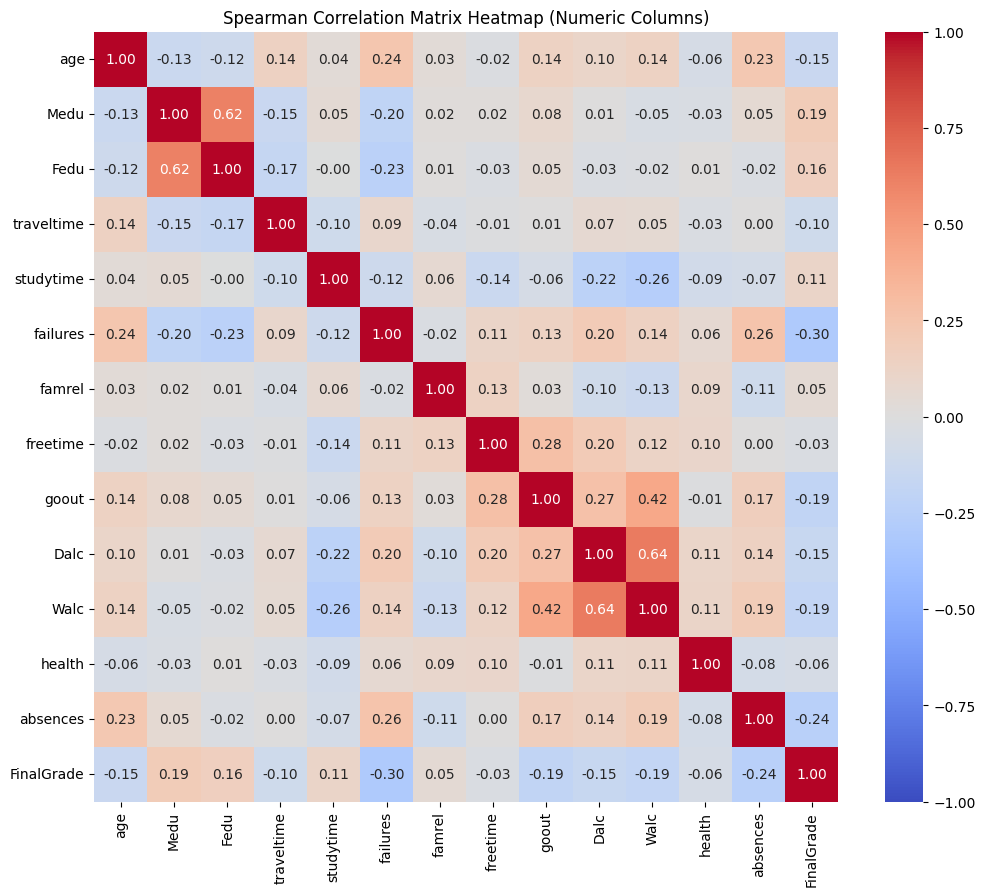

In [17]:
df = df.drop(columns=['StudentID'])

# Filter numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_columns]

# Calculate Spearman correlation matrix
corr_matrix_spearman = df_numeric.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix Heatmap (Numeric Columns)')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
# Split data into features (X) and target (y)
X = df_numeric.drop('FinalGrade', axis=1)  # Features
y = df_numeric['FinalGrade']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

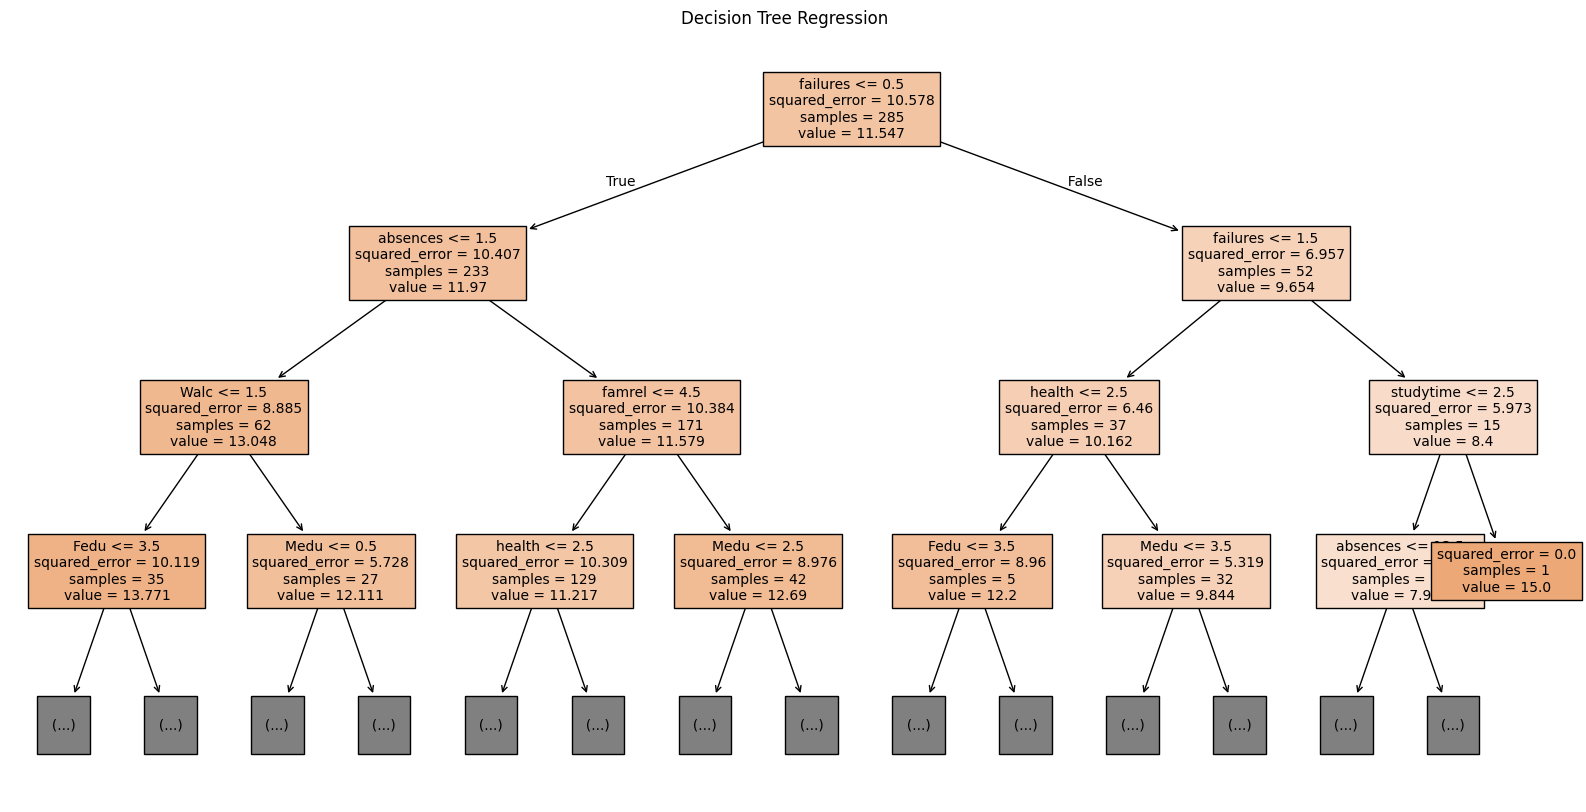

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns, max_depth=3, fontsize=10)
plt.title("Decision Tree Regression")
plt.show()
